# **Import Library**

In [1]:
import string
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

nltk.download('stopwords')
!pip install wordcloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import plot_confusion_matrix
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Read Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/Othercomputers/My Laptop/Jurnal/5000_data.csv",sep=';', encoding='utf-8')
data = data.drop(columns=['user'], axis=1)
data.head()

,Comment,Label
0,Wong cilik yang mba...,NON-CYBERBULYING
1,Aku wong cilik tapi pake sepatu bu,NON-CYBERBULYING
2,Ahahaha. Kontlo. Niatan mau merakyat malah ga...,CYBERBULLYING
3,Mantaab mbak puan..maju trus..smoga jadi pres...,NON-CYBERBULYING
4,"Wes tah puan, rekam jejakmu ora genah blas ðŸ‘Ž",CYBERBULLYING


# **Preprocessing**

In [4]:
def casefolding(text):
    text = text.lower()
    return text

data['Comment'] = data['Comment'].apply(casefolding)
data.head()

,Comment,Label
0,wong cilik yang mba...,NON-CYBERBULYING
1,aku wong cilik tapi pake sepatu bu,NON-CYBERBULYING
2,ahahaha. kontlo. niatan mau merakyat malah ga...,CYBERBULLYING
3,mantaab mbak puan..maju trus..smoga jadi pres...,NON-CYBERBULYING
4,"wes tah puan, rekam jejakmu ora genah blas ðÿ‘ž",CYBERBULLYING


In [5]:
def cleaning(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\S+", "", text)
    text = re.sub(r"#\S+", "", text)
    text = re.sub(r"\s+", " ", text)
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    return text

data['Comment'] = data['Comment'].apply(cleaning)
data.head()

,Comment,Label
0,wong cilik yang mba,NON-CYBERBULYING
1,aku wong cilik tapi pake sepatu bu,NON-CYBERBULYING
2,ahahaha kontlo niatan mau merakyat malah ga...,CYBERBULLYING
3,mantaab mbak puan maju trus smoga jadi pres...,NON-CYBERBULYING
4,wes tah puan rekam jejakmu ora genah blas,CYBERBULLYING


In [6]:
def token(text):
    text = text.split()
    return text
  
data['Comment'] = data['Comment'].apply(token)
data

,Comment,Label
0,"[wong, cilik, yang, mba]",NON-CYBERBULYING
1,"[aku, wong, cilik, tapi, pake, sepatu, bu]",NON-CYBERBULYING
2,"[ahahaha, kontlo, niatan, mau, merakyat, malah...",CYBERBULLYING
3,"[mantaab, mbak, puan, maju, trus, smoga, jadi,...",NON-CYBERBULYING
4,"[wes, tah, puan, rekam, jejakmu, ora, genah, b...",CYBERBULLYING
...,...,...
4995,"[sedng, kritik, kenaikan, eeeh, micnya, dimati...",CYBERBULLYING
4996,"[mana, bukti, kebijakan, untuk, wong, cilik, s...",NON-CYBERBULYING
4997,"[kenapa, warung, mane, warungnye]",NON-CYBERBULYING
4998,"[lambemu, bosok, belatung]",CYBERBULLYING


In [7]:
def stopword_removal(text):
    stopword = stopwords.words('indonesian')
    text = [word for word in text if word not in stopword]
    return text
  
data['Comment'] = data['Comment'].apply(stopword_removal)
cyberbullying_clean = data.dropna()
cyberbullying_clean

,Comment,Label
0,"[cilik, mba]",NON-CYBERBULYING
1,"[cilik, pake, sepatu, bu]",NON-CYBERBULYING
2,"[ahahaha, kontlo, niatan, merakyat, gak, ngerti]",CYBERBULLYING
3,"[mantaab, mbak, puan, maju, trus, smoga, presi...",NON-CYBERBULYING
4,"[wes, tah, puan, rekam, jejakmu, ora, genah, b...",CYBERBULLYING
...,...,...
4995,"[sedng, kritik, kenaikan, eeeh, micnya, dimati...",CYBERBULLYING
4996,"[bukti, kebijakan, cilik, blt, yg, dl, cela, e...",NON-CYBERBULYING
4997,"[warung, mane, warungnye]",NON-CYBERBULYING
4998,"[lambemu, bosok, belatung]",CYBERBULLYING


In [8]:
cyberbullying_clean = cyberbullying_clean.astype({'Label': 'category'})
cyberbullying_clean = cyberbullying_clean.astype({'Comment': 'string'})

# TF-**IDF**

In [9]:
tfidf = TfidfVectorizer()
text_tf = tfidf.fit_transform(cyberbullying_clean['Comment'].astype("U"))

# **Split Data**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(text_tf, cyberbullying_clean['Label'], test_size=0.4, random_state=42)

# **Model**

In [11]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy for", clf, " is ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy for SVC()  is  0.794
                  precision    recall  f1-score   support

   CYBERBULLYING       0.70      0.10      0.17       436
NON-CYBERBULYING       0.80      0.99      0.88      1564

        accuracy                           0.79      2000
       macro avg       0.75      0.54      0.53      2000
    weighted avg       0.78      0.79      0.73      2000



# **Plot**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


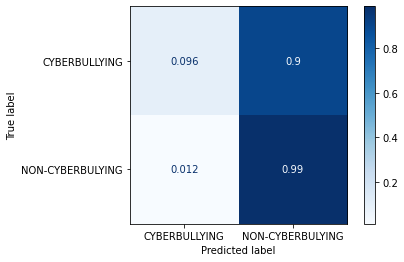

In [12]:
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
plt.show()

# Word **Cloud**

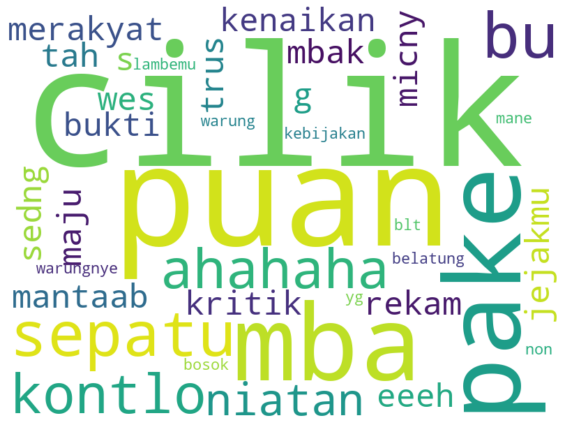

In [13]:
def wordcloud(text):
    text = str(text)
    exclude = ['Comment', 'Name', 'Length', 'dtype', 'string',
               'cyberbulying', 'non-cyberbullying', "'"]
    for i in exclude:
        text = text.replace(i, "")
    wordcloud = WordCloud(background_color='white',
                          width=800, height=600).generate(text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

wordcloud(cyberbullying_clean['Comment'])